<a href="https://colab.research.google.com/github/Jameseen/Jameseen-/blob/main/BHQ_HF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical analysis and Machine learning predict Motality rate in Heart failure **

In [ ]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Importing the dataset that I downloaded from "https://www.kaggle.com/andrewmvd/heart-failure-clinical-data/notebooks"
data= pd.read_csv('/HF - data.csv')

In [ ]:
data.head()

,No,AGE,Gender,LOS(Day),I_Distance(m),D_Distance,Dif_6MWT(M),I_Basic,I_Daily,I_cognitive,D_Basic,D_Daily,D_cognitive,Dif_Basic,Dif_Daily,EF,HT,DM,CRF,DLP,Smoke,Obesity,Mobidity
0,1,53,0,14,154,159,5,21,22,24,24,24,24,3,2,30,1,0,1,1,0,1,0
1,2,60,0,20,25,47,22,19,19,22,21,21,22,2,2,40,0,1,1,1,1,1,0
2,3,71,1,1,160,162,2,21,24,24,24,24,24,3,0,62,1,0,0,1,0,1,0
3,4,78,1,2,60,64,4,12,14,22,18,21,22,6,7,32,1,0,1,1,0,0,0
4,5,71,1,13,280,310,30,18,15,16,21,18,19,3,3,24,1,1,0,0,0,1,0


In [ ]:
data.tail()

,No,AGE,Gender,LOS(Day),I_Distance(m),D_Distance,Dif_6MWT(M),I_Basic,I_Daily,I_cognitive,D_Basic,D_Daily,D_cognitive,Dif_Basic,Dif_Daily,EF,HT,DM,CRF,DLP,Smoke,Obesity,Mobidity
101,111,71,1,6,56,57,1,17,18,23,20,21,24,3,3,46,0,1,0,1,0,0,0
102,112,36,1,7,288,317,29,17,18,23,21,24,23,4,6,50,0,1,1,0,0,0,0
103,114,57,0,5,90,140,50,11,12,12,19,21,17,8,9,34,0,0,0,0,1,0,0
104,115,82,0,12,87,98,11,16,17,24,24,23,24,8,6,50,1,0,0,1,0,0,0
105,116,55,1,5,426,428,2,15,20,24,24,24,24,9,4,70,1,0,1,1,1,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   No               106 non-null    int64
 1   AGE              106 non-null    int64
 2   Gender           106 non-null    int64
 3   LOS(Day)         106 non-null    int64
 4   I_Distance(m)    106 non-null    int64
 5   D_Distance       106 non-null    int64
 6   Dif_6MWT(M)      106 non-null    int64
 7    I_Basic         106 non-null    int64
 8   I_Daily          106 non-null    int64
 9       I_cognitive  106 non-null    int64
 10   D_Basic         106 non-null    int64
 11  D_Daily          106 non-null    int64
 12      D_cognitive  106 non-null    int64
 13  Dif_Basic        106 non-null    int64
 14  Dif_Daily        106 non-null    int64
 15  EF               106 non-null    int64
 16  HT               106 non-null    int64
 17  DM               106 non-null    int64
 18  CRF       

In [ ]:
# Checking for null values
data.isnull().sum()

No                 0
AGE                0
Gender             0
LOS(Day)           0
I_Distance(m)      0
D_Distance         0
Dif_6MWT(M)        0
 I_Basic           0
I_Daily            0
    I_cognitive    0
 D_Basic           0
D_Daily            0
    D_cognitive    0
Dif_Basic          0
Dif_Daily          0
EF                 0
HT                 0
DM                 0
CRF                0
DLP                0
Smoke              0
Obesity            0
Mobidity           0
dtype: int64

In [ ]:
print(data.var())

No                 1102.500000
AGE                 196.170081
Gender                0.247978
LOS(Day)            338.696226
I_Distance(m)      8122.028482
D_Distance         8411.281312
Dif_6MWT(M)         332.739623
 I_Basic             29.044025
I_Daily              33.546181
    I_cognitive      42.927942
 D_Basic             18.770889
D_Daily              15.487871
    D_cognitive      29.018149
Dif_Basic            14.511770
Dif_Daily            15.638904
EF                  249.427224
HT                    0.246631
DM                    0.252291
CRF                   0.226415
DLP                   0.246631
Smoke                 0.237197
Obesity               0.245103
Mobidity              0.045373
dtype: float64


In [ ]:
print(data.mean())

No                  56.500000
AGE                 74.896226
Gender               0.433962
LOS(Day)            12.235849
I_Distance(m)      100.009434
D_Distance         112.066038
Dif_6MWT(M)         12.056604
 I_Basic            15.245283
I_Daily             16.462264
    I_cognitive     17.792453
 D_Basic            19.830189
D_Daily             20.811321
    D_cognitive     19.622642
Dif_Basic            4.584906
Dif_Daily            4.349057
EF                  47.103774
HT                   0.575472
DM                   0.490566
CRF                  0.660377
DLP                  0.575472
Smoke                0.622642
Obesity              0.415094
Mobidity             0.047170
dtype: float64


In [ ]:
data.describe()

,No,AGE,Gender,LOS(Day),I_Distance(m),D_Distance,Dif_6MWT(M),I_Basic,I_Daily,I_cognitive,D_Basic,D_Daily,D_cognitive,Dif_Basic,Dif_Daily,EF,HT,DM,CRF,DLP,Smoke,Obesity,Mobidity
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,56.500000,74.896226,0.433962,12.235849,100.009434,112.066038,12.056604,15.245283,16.462264,17.792453,19.830189,20.811321,19.622642,4.584906,4.349057,47.103774,0.575472,0.490566,0.660377,0.575472,0.622642,0.415094,0.047170
std,33.203915,14.006073,0.497974,18.403701,90.122297,91.713038,18.241152,5.389251,5.791907,6.551942,4.332538,3.935463,5.386850,3.809432,3.954605,15.793265,0.496619,0.502286,0.475831,0.496619,0.487029,0.495079,0.213009
min,1.000000,36.000000,0.000000,1.000000,0.000000,0.000000,-10.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,-3.000000,-1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.250000,66.250000,0.000000,4.000000,32.250000,43.500000,4.000000,11.000000,12.000000,12.000000,17.250000,19.000000,17.000000,2.000000,1.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.500000,78.500000,0.000000,7.000000,72.000000,87.500000,8.000000,16.000000,17.500000,20.500000,21.000000,21.000000,22.000000,4.000000,4.000000,44.500000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,84.750000,85.000000,1.000000,12.000000,120.000000,136.250000,14.000000,19.750000,21.000000,24.000000,24.000000,24.000000,24.000000,6.750000,6.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,116.000000,101.000000,1.000000,107.000000,426.000000,428.000000,123.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,18.000000,17.000000,84.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.columns

Index(['No', 'AGE', 'Gender', 'LOS(Day)', 'I_Distance(m)', 'D_Distance',
       'Dif_6MWT(M)', ' I_Basic', 'I_Daily', '    I_cognitive', ' D_Basic',
       'D_Daily', '    D_cognitive', 'Dif_Basic', 'Dif_Daily', 'EF', 'HT',
       'DM', 'CRF', 'DLP', 'Smoke', 'Obesity', 'Mobidity'],
      dtype='object')

In [ ]:
# defining feature matrix(X) and response vector(y) 
X = data[[ 'AGE', 'Gender', 'LOS(Day)', 'I_Distance(m)', 'D_Distance',
       'Dif_6MWT(M)', ' I_Basic', 'I_Daily', '    I_cognitive', ' D_Basic',
       'D_Daily', '    D_cognitive', 'Dif_Basic', 'Dif_Daily', 'EF', 'HT',
       'DM', 'CRF', 'DLP', 'Smoke', 'Obesity']]
y = data['Mobidity']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Mobidity, dtype: int64

In [ ]:
X

,AGE,Gender,LOS(Day),I_Distance(m),D_Distance,Dif_6MWT(M),I_Basic,I_Daily,I_cognitive,D_Basic,D_Daily,D_cognitive,Dif_Basic,Dif_Daily,EF,HT,DM,CRF,DLP,Smoke,Obesity
0,53,0,14,154,159,5,21,22,24,24,24,24,3,2,30,1,0,1,1,0,1
1,60,0,20,25,47,22,19,19,22,21,21,22,2,2,40,0,1,1,1,1,1
2,71,1,1,160,162,2,21,24,24,24,24,24,3,0,62,1,0,0,1,0,1
3,78,1,2,60,64,4,12,14,22,18,21,22,6,7,32,1,0,1,1,0,0
4,71,1,13,280,310,30,18,15,16,21,18,19,3,3,24,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,71,1,6,56,57,1,17,18,23,20,21,24,3,3,46,0,1,0,1,0,0
102,36,1,7,288,317,29,17,18,23,21,24,23,4,6,50,0,1,1,0,0,0
103,57,0,5,90,140,50,11,12,12,19,21,17,8,9,34,0,0,0,0,1,0
104,82,0,12,87,98,11,16,17,24,24,23,24,8,6,50,1,0,0,1,0,0


In [ ]:
data[['AGE']]

,AGE
0,53
1,60
2,71
3,78
4,71
...,...
101,71
102,36
103,57
104,82


In [ ]:
X.head()

,AGE,Gender,LOS(Day),I_Distance(m),D_Distance,Dif_6MWT(M),I_Basic,I_Daily,I_cognitive,D_Basic,D_Daily,D_cognitive,Dif_Basic,Dif_Daily,EF,HT,DM,CRF,DLP,Smoke,Obesity
0,53,0,14,154,159,5,21,22,24,24,24,24,3,2,30,1,0,1,1,0,1
1,60,0,20,25,47,22,19,19,22,21,21,22,2,2,40,0,1,1,1,1,1
2,71,1,1,160,162,2,21,24,24,24,24,24,3,0,62,1,0,0,1,0,1
3,78,1,2,60,64,4,12,14,22,18,21,22,6,7,32,1,0,1,1,0,0
4,71,1,13,280,310,30,18,15,16,21,18,19,3,3,24,1,1,0,0,0,1


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Mobidity, dtype: int64

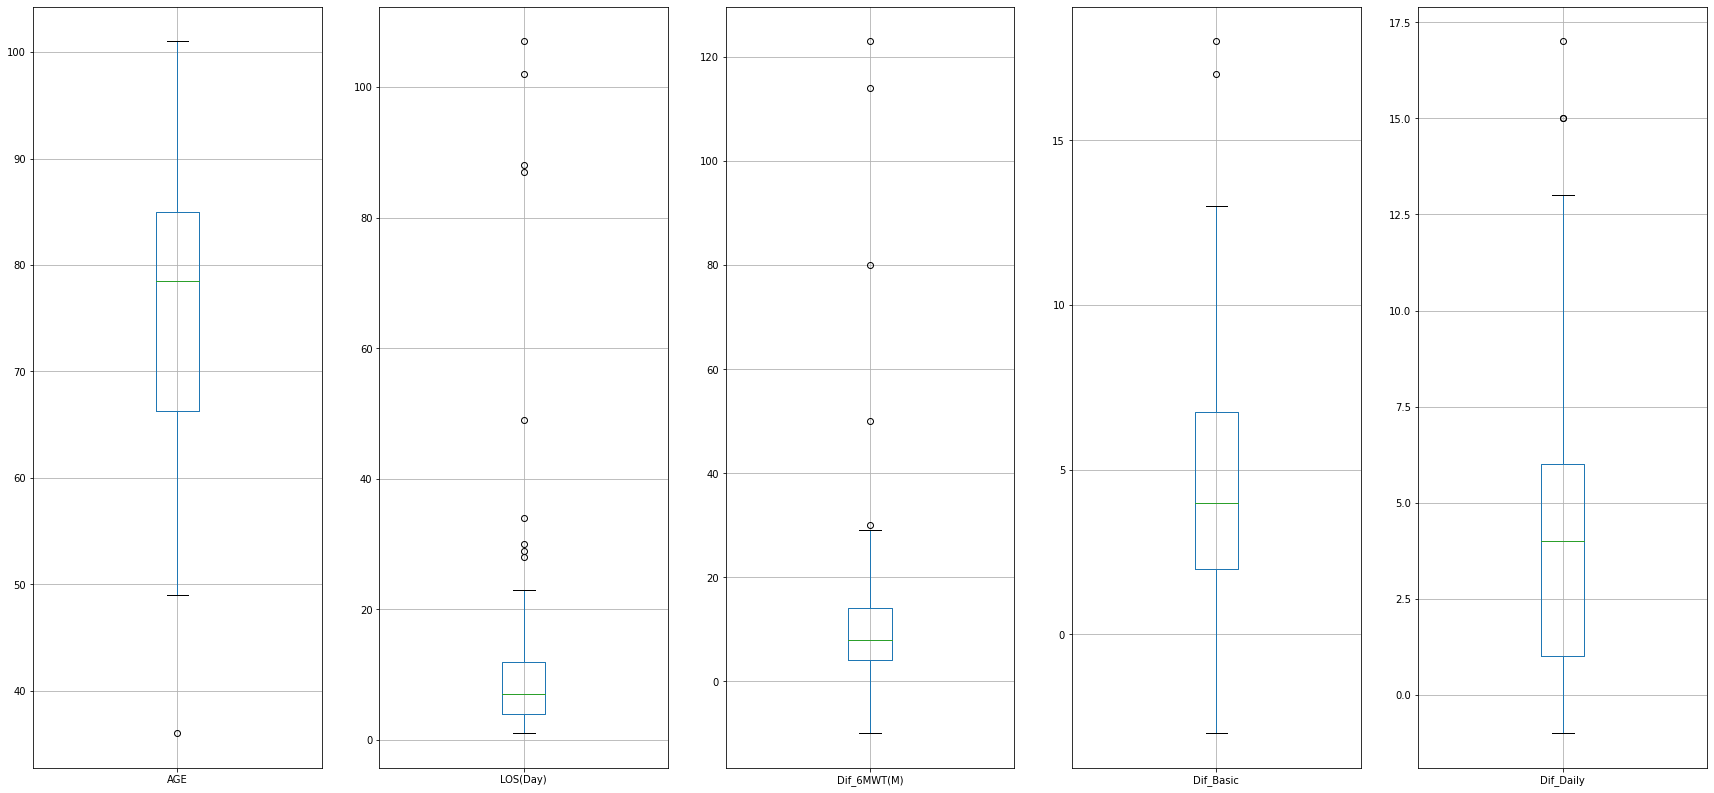

In [ ]:
fig, ax=plt.subplots(1,5, figsize=(30, 14))
columns=['AGE', 'LOS(Day)', 'Dif_6MWT(M)',
       'Dif_Basic', 'Dif_Daily']
for i, column in enumerate(columns):
    data.boxplot(column, ax=ax[i])

In [ ]:
data.corr()

,No,AGE,Gender,LOS(Day),I_Distance(m),D_Distance,Dif_6MWT(M),I_Basic,I_Daily,I_cognitive,D_Basic,D_Daily,D_cognitive,Dif_Basic,Dif_Daily,EF,HT,DM,CRF,DLP,Smoke,Obesity,Mobidity
No,1.000000,-0.068573,-0.002304,-0.134042,0.018887,0.006597,-0.060145,-0.007185,0.047318,0.097974,0.068984,0.105680,0.187585,0.088621,0.035866,0.104710,-0.052269,-0.010850,-0.016878,-0.047071,0.130743,-0.309956,0.174379
AGE,-0.068573,1.000000,-0.441361,0.037672,-0.393971,-0.401154,-0.070468,-0.360388,-0.371682,-0.382260,-0.417614,-0.426957,-0.389941,0.034885,0.119475,0.000264,0.120943,0.047918,-0.098226,0.012775,0.104502,-0.048668,0.052732
Gender,-0.002304,-0.441361,1.000000,0.091606,0.360245,0.340733,-0.066686,0.222567,0.236875,0.278902,0.219882,0.163670,0.256897,-0.064792,-0.184048,0.016017,0.135877,0.016524,0.065219,-0.056676,-0.103729,0.228138,-0.105032
LOS(Day),-0.134042,0.037672,0.091606,1.000000,-0.143744,-0.143787,-0.012750,-0.274832,-0.330458,-0.310785,-0.292608,-0.281700,-0.199776,0.056020,0.203652,-0.091013,0.166322,-0.002333,0.097326,-0.012907,0.066339,0.068594,-0.019871
I_Distance(m),0.018887,-0.393971,0.360245,-0.143744,1.000000,0.980025,-0.013226,0.520706,0.521687,0.437858,0.501198,0.477682,0.455133,-0.166627,-0.288691,0.150632,0.019880,0.024513,0.092908,-0.019061,-0.073692,0.129264,-0.073448
D_Distance,0.006597,-0.401154,0.340733,-0.143787,0.980025,1.000000,0.185897,0.480893,0.488043,0.440649,0.505184,0.490562,0.455476,-0.105770,-0.226600,0.143236,0.017349,0.033816,0.109637,-0.032626,-0.052315,0.094198,-0.081575
Dif_6MWT(M),-0.060145,-0.070468,-0.066686,-0.012750,-0.013226,0.185897,1.000000,-0.154762,-0.123657,0.052215,0.063751,0.106416,0.041411,0.291448,0.287009,-0.024054,-0.010989,0.048913,0.092210,-0.069863,0.101053,-0.165033,-0.047265
I_Basic,-0.007185,-0.360388,0.222567,-0.274832,0.520706,0.480893,-0.154762,1.000000,0.900383,0.596457,0.713156,0.661396,0.569443,-0.603627,-0.660504,0.083060,-0.195579,0.180296,0.040222,-0.014099,-0.091397,0.211341,-0.068249
I_Daily,0.047318,-0.371682,0.236875,-0.330458,0.521687,0.488043,-0.123657,0.900383,1.000000,0.726094,0.745520,0.732548,0.672919,-0.425889,-0.735596,0.142109,-0.156275,0.127551,0.012584,-0.023833,-0.099631,0.181546,-0.025562
I_cognitive,0.097974,-0.382260,0.278902,-0.310785,0.437858,0.440649,0.052215,0.596457,0.726094,1.000000,0.646270,0.654443,0.835072,-0.108799,-0.412161,0.126395,-0.126853,0.051490,-0.025880,0.060472,-0.162069,0.114894,-0.033863


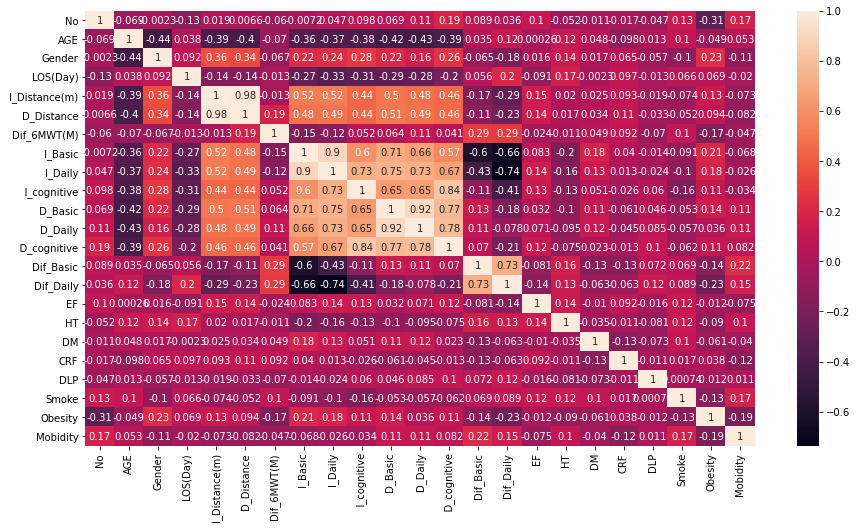

In [ ]:
##Plot rectangular data as a color-encoded matrix.
import seaborn as sns
decorr = data.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(50, 50, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(decorr, annot=True)

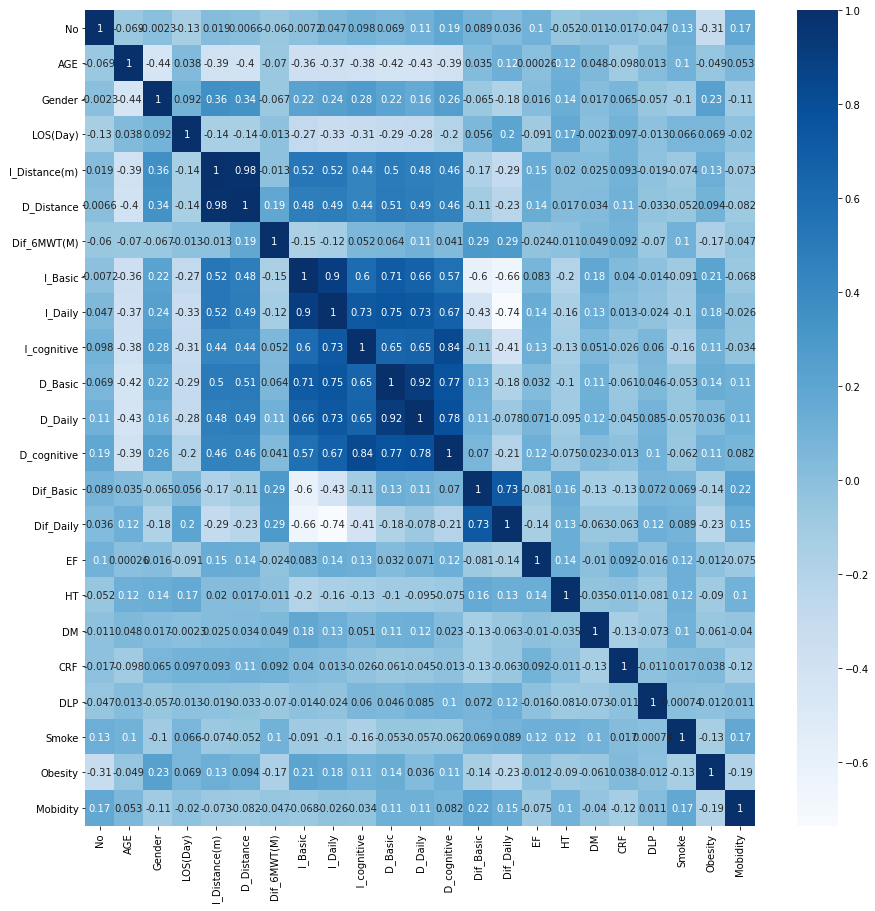

In [ ]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot = True, cmap = "Blues")
plt.show()

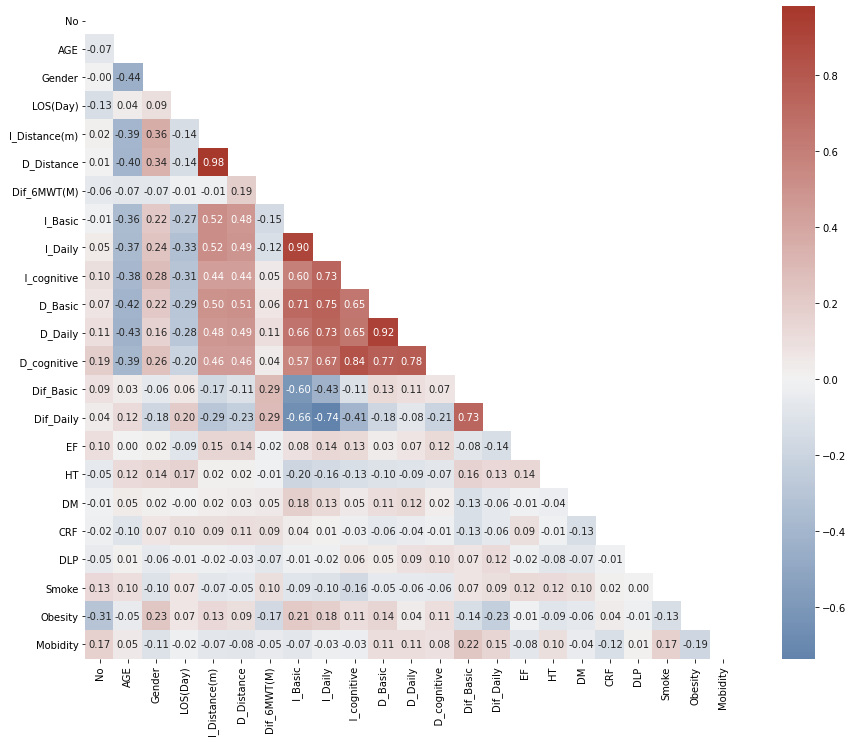

In [ ]:
# Calculate pairwise-correlation
matrix = data.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(16, 12))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

# **EDA**

**Manipulating data**

In [ ]:
data.shape    # 106 rows and 23 columns

(106, 23)

In [ ]:

data.columns  # It has columns 

Index(['No', 'AGE', 'Gender', 'LOS(Day)', 'I_Distance(m)', 'D_Distance',
       'Dif_6MWT(M)', ' I_Basic', 'I_Daily', '    I_cognitive', ' D_Basic',
       'D_Daily', '    D_cognitive', 'Dif_Basic', 'Dif_Daily', 'EF', 'HT',
       'DM', 'CRF', 'DLP', 'Smoke', 'Obesity', 'Mobidity'],
      dtype='object')

In [ ]:
print(data['D_Distance'])  # Columns can be addressed by name   


0      159
1       47
2      162
3       64
4      310
      ... 
101     57
102    317
103    140
104     98
105    428
Name: D_Distance, Length: 106, dtype: int64


In [ ]:
data['D_Distance']> 50

0       True
1      False
2       True
3       True
4       True
       ...  
101     True
102     True
103     True
104     True
105     True
Name: D_Distance, Length: 106, dtype: bool

**groupby: splitting a dataframe on values of categorical variables:**

In [ ]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['EF']:
    print((gender, value.mean()))

(0, 46.88333333333333)
(1, 47.391304347826086)


**Plotting data**

groupby_gender is a powerful object that exposes many operations on the resulting group of dataframes:

In [ ]:
groupby_gender.mean()

,No,AGE,LOS(Day),I_Distance(m),D_Distance,Dif_6MWT(M),I_Basic,I_Daily,I_cognitive,D_Basic,D_Daily,D_cognitive,Dif_Basic,Dif_Daily,EF,HT,DM,CRF,DLP,Smoke,Obesity,Mobidity
Gender,,,,,,,,,,,,,,,,,,,,,,
0,56.566667,80.283333,10.766667,71.716667,84.833333,13.116667,14.200000,15.266667,16.200000,19.000000,20.250000,18.416667,4.800000,4.983333,46.883333,0.516667,0.483333,0.633333,0.600000,0.666667,0.316667,0.066667
1,56.413043,67.869565,14.152174,136.913043,147.586957,10.673913,16.608696,18.021739,19.869565,20.913043,21.543478,21.195652,4.304348,3.521739,47.391304,0.652174,0.500000,0.695652,0.543478,0.565217,0.543478,0.021739


# **STATISTICS::::Hypothesis testing in Machine learning using Python**

In [ ]:
data.describe()

,No,AGE,Gender,LOS(Day),I_Distance(m),D_Distance,Dif_6MWT(M),I_Basic,I_Daily,I_cognitive,D_Basic,D_Daily,D_cognitive,Dif_Basic,Dif_Daily,EF,HT,DM,CRF,DLP,Smoke,Obesity,Mobidity
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,56.500000,74.896226,0.433962,12.235849,100.009434,112.066038,12.056604,15.245283,16.462264,17.792453,19.830189,20.811321,19.622642,4.584906,4.349057,47.103774,0.575472,0.490566,0.660377,0.575472,0.622642,0.415094,0.047170
std,33.203915,14.006073,0.497974,18.403701,90.122297,91.713038,18.241152,5.389251,5.791907,6.551942,4.332538,3.935463,5.386850,3.809432,3.954605,15.793265,0.496619,0.502286,0.475831,0.496619,0.487029,0.495079,0.213009
min,1.000000,36.000000,0.000000,1.000000,0.000000,0.000000,-10.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,-3.000000,-1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.250000,66.250000,0.000000,4.000000,32.250000,43.500000,4.000000,11.000000,12.000000,12.000000,17.250000,19.000000,17.000000,2.000000,1.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.500000,78.500000,0.000000,7.000000,72.000000,87.500000,8.000000,16.000000,17.500000,20.500000,21.000000,21.000000,22.000000,4.000000,4.000000,44.500000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,84.750000,85.000000,1.000000,12.000000,120.000000,136.250000,14.000000,19.750000,21.000000,24.000000,24.000000,24.000000,24.000000,6.750000,6.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,116.000000,101.000000,1.000000,107.000000,426.000000,428.000000,123.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,18.000000,17.000000,84.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **One sample t-test :**


https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

In [ ]:
from scipy.stats import ttest_1samp
import numpy as np
ages = data[['Dif_6MWT(M)']]
print(ages)
ages_mean = np.mean(ages)
print(ages_mean)
tset, pval = ttest_1samp(ages, 12)
print( 'p-values' ,pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

     Dif_6MWT(M)
0              5
1             22
2              2
3              4
4             30
..           ...
101            1
102           29
103           50
104           11
105            2

[106 rows x 1 columns]
Dif_6MWT(M)    12.056604
dtype: float64
p-values [0.97457403]
we are accepting null hypothesis


# **Two sampled T-test :-**

In [ ]:
from scipy.stats import ttest_ind
import numpy as np
week1 = data[['Dif_6MWT(M)']]
week2 =data[['Dif_Basic']]
print(week1)
print("week2 data :-\n")
print(week2)
week1_mean = np.mean(week1)
week2_mean = np.mean(week2)
print("week1 mean value:",week1_mean)
print("week2 mean value:",week2_mean)
week1_std = np.std(week1)
week2_std = np.std(week2)
print("week1 std value:",week1_std)
print("week2 std value:",week2_std)
ttest,pval = ttest_ind(week1,week2)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

     Dif_6MWT(M)
0              5
1             22
2              2
3              4
4             30
..           ...
101            1
102           29
103           50
104           11
105            2

[106 rows x 1 columns]
week2 data :-

     Dif_Basic
0            3
1            2
2            3
3            6
4            3
..         ...
101          3
102          4
103          8
104          8
105          9

[106 rows x 1 columns]
week1 mean value: Dif_6MWT(M)    12.056604
dtype: float64
week2 mean value: Dif_Basic    4.584906
dtype: float64
week1 std value: Dif_6MWT(M)    18.154905
dtype: float64
week2 std value: Dif_Basic    3.79142
dtype: float64
p-value [5.27581344e-05]
we reject null hypothesis


# **Paired sampled t-test :**

H0 :- means difference between two sample is 0


H1:- mean difference between two sample is not 0

In [ ]:
import pandas as pd
from scipy import stats
data[['I_Daily','D_Daily']].describe()
ttest,pval = stats.ttest_rel(data['I_Daily'], data['D_Daily'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

6.662066266792966e-20
reject null hypothesis


# **Z Test**

Several different types of tests are used in statistics (i.e. f test, chi square test, t test). You would use a Z test if:

Your sample size is greater than 30. Otherwise, use a t test.

Data points should be independent from each other. 

In other words, one data point isn’t related or doesn’t affect another data point.

Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.

Your data should be randomly selected from a population, where each item has an equal chance of being selected.

Sample sizes should be equal if at all possible.



**one-sample Z test.**

(Know  mean )

In [ ]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(data['I_Daily'], x2=None, value=16)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.41123870389454487
accept null hypothesis


**Two-sample Z test**
- In two sample z-test , similar to t-test here we are checking two independent data groups and deciding whether sample mean of two group is equal or not.

H0 : mean of two group is 0

H1 : mean of two group is not 0


In [ ]:
ztest ,pval1 = stests.ztest(data['I_Daily'], x2=data['D_Daily'], value=0,alternative='two-sided')
print(float(pval1))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.6118985105785582e-10
accept null hypothesis


**ANOVA (F-TEST)** 

- The t-test works well when dealing with two groups, but sometimes we want to compare **more than two groups at the same time**.

# **Predicting motarity rate by Machine Learning**

https://github.com/nadaalay/Heart-Disease-Classifier-Web-App/blob/master/Heart_Disease_Classification.ipynb

In [ ]:
data['Mobidity'].value_counts()

0    101
1      5
Name: Mobidity, dtype: int64

# **Modeling**

**1. Prepare Data for Machine Learning**

Here, I will use the below machine learning algorithms then I will select the best one based on its classification report.

Support Vector Machine

Random Forest

Ada Boost

Gradient Boosting

**2. Train and Evaluate Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [ ]:
#Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
#Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# Split data into X and y
X = data[[ 'AGE', 'Gender', 'LOS(Day)', 'I_Distance(m)', 'D_Distance',
       'Dif_6MWT(M)', ' I_Basic', 'I_Daily', '    I_cognitive', ' D_Basic',
       'D_Daily', '    D_cognitive', 'Dif_Basic', 'Dif_Daily', 'EF', 'HT',
       'DM', 'CRF', 'DLP', 'Smoke', 'Obesity']]
y = data[['Mobidity']]
# Standardization
sc = StandardScaler()

In [ ]:
y.value_counts()

Mobidity
0           101
1             5
dtype: int64

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ

# **Resampling strategies for imbalanced datasets**

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [ ]:
import imblearn

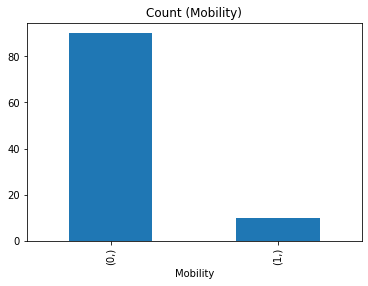

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

data = pd.DataFrame(X)
data['Mobility'] = y
data[['Mobility']].value_counts().plot(kind='bar', title='Count (Mobility)');

In [ ]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

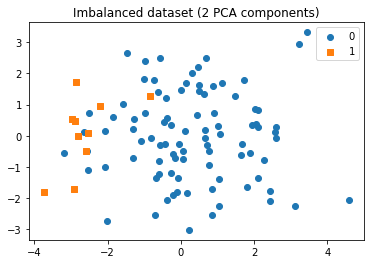

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

**Random under-sampling and over-sampling with imbalanced-learn**

Removed indexes: [61 31 73 79 66 24 76 22 36 97  4  8  9 14 16 40 67 70 71 74]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


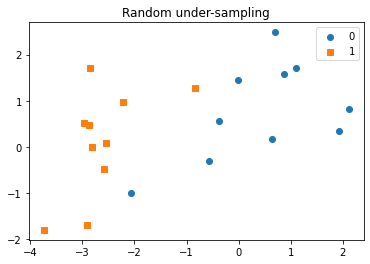

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

80 new random picked points


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


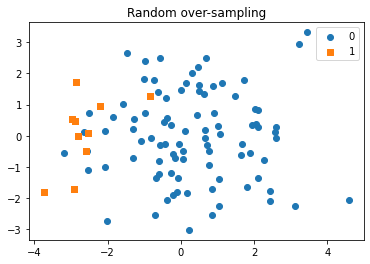

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

**Under-sampling: Tomek links**

Removed indexes: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90 91 92 93 94 95 97 98 99]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


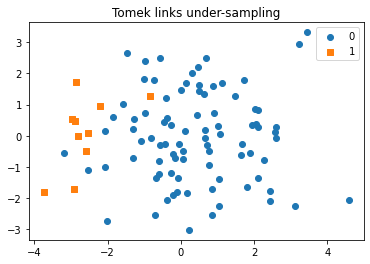

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

**Under-sampling: Cluster Centroids**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


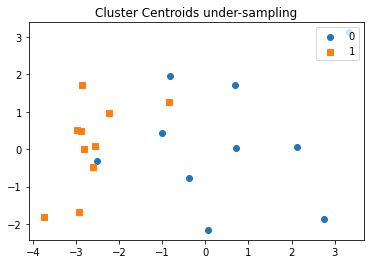

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

**Over-sampling: SMOTE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


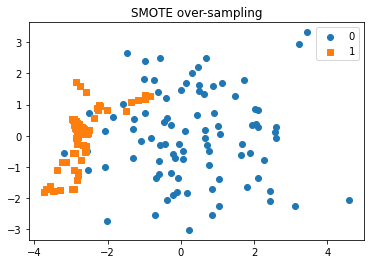

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

**Over-sampling followed by under-sampling**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


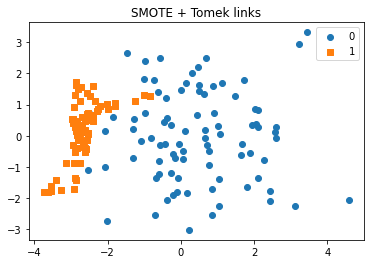

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

**Recommended reading**

The imbalanced-learn documentation:
http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html

The imbalanced-learn GitHub:
https://github.com/scikit-learn-contrib/imbalanced-learn

Comparison of the combination of over- and under-sampling algorithms:
http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/combine/plot_comparison_combine.html

Chawla, Nitesh V., et al. "SMOTE: synthetic minority over-sampling technique." Journal of artificial intelligence research 16 (2002):
https://www.jair.org/media/953/live-953-2037-jair.pdf

https://www.researchgate.net/publication/224330873_ADASYN_Adaptive_Synthetic_Sampling_Approach_for_Imbalanced_Learning

https://www.kaggle.com/anirudhg15/heart-failure-prediction-adasyn-xgboost-85-f1?scriptVersionId=56785337

# **Let's try to do.....go!!!!**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


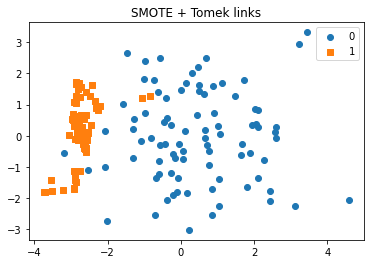

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

In [ ]:
#split
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state=42)

In [ ]:
# Standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Create a model dictionary
models = {"Logistic Regression   ": LogisticRegression(),
          "K-Nearest Neighbors   ": KNeighborsClassifier(),
          "Decision Tree         ": DecisionTreeClassifier(),
          "Random Forest         ": RandomForestClassifier(),
          "Mulilayer Perceptron  ": MLPClassifier()
         }

In [ ]:
# Fit the models
for name, model in models.items():
    model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#Model Evaluation
# Recall

for name, model in models.items():
   # print(name + ": {:.3f}".format(recall_score(y_test, model.predict(X_test))))
    print(name)
    print(metrics.classification_report(y_test,model.predict(X_test),digits=2))

Logistic Regression   
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.94      0.94      0.94        17

    accuracy                           0.94        35
   macro avg       0.94      0.94      0.94        35
weighted avg       0.94      0.94      0.94        35

K-Nearest Neighbors   
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        17

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

Decision Tree         
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.94      0.97        17

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weigh